In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from opensoundscape import BoxedAnnotations, CNN

In [3]:
metadata = pd.read_csv('./data/metadata.csv')
metadata.head()

,Unnamed: 0,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Species,Conf,Call_type,Filename,SiteHab,RecordingSched,RecorderName,DP,SoundFile,SoundFile_path,Split,Raven_path
0,0,0.763354,3.078034,2854.369,5965.410,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
1,1,6.588949,9.475884,2571.297,5451.150,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
2,2,10.434780,12.523959,3085.557,5348.299,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
3,3,14.854197,15.436757,3085.557,5862.558,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
4,4,55.578030,59.479764,2621.359,5475.728,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...


In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6875 entries, 0 to 6874
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6875 non-null   int64  
 1   Begin Time (s)  6875 non-null   float64
 2   End Time (s)    6875 non-null   float64
 3   Low Freq (Hz)   6875 non-null   float64
 4   High Freq (Hz)  6875 non-null   float64
 5   Species         6865 non-null   object 
 6   Conf            5972 non-null   float64
 7   Call_type       5904 non-null   object 
 8   Filename        6875 non-null   object 
 9   SiteHab         6875 non-null   object 
 10  RecordingSched  6875 non-null   object 
 11  RecorderName    6875 non-null   object 
 12  DP              6875 non-null   object 
 13  SoundFile       6875 non-null   object 
 14  SoundFile_path  6875 non-null   object 
 15  Split           6875 non-null   object 
 16  Raven_path      6875 non-null   object 
dtypes: float64(5), int64(1), object(1

In [20]:
val_metadata=metadata[metadata["Split"]=="validation"]
train_metadata=metadata[metadata["Split"]=="train"]
test_metadata=metadata[metadata["Split"]=="test"]

In [26]:
val_metadata=val_metadata.reset_index()
train_metadata=train_metadata.reset_index()
test_metadata=test_metadata.reset_index()

In [27]:
val_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         848 non-null    int64  
 1   index           848 non-null    int64  
 2   Unnamed: 0      848 non-null    int64  
 3   Begin Time (s)  848 non-null    float64
 4   End Time (s)    848 non-null    float64
 5   Low Freq (Hz)   848 non-null    float64
 6   High Freq (Hz)  848 non-null    float64
 7   Species         840 non-null    object 
 8   Conf            732 non-null    float64
 9   Call_type       724 non-null    object 
 10  Filename        848 non-null    object 
 11  SiteHab         848 non-null    object 
 12  RecordingSched  848 non-null    object 
 13  RecorderName    848 non-null    object 
 14  DP              848 non-null    object 
 15  SoundFile       848 non-null    object 
 16  SoundFile_path  848 non-null    object 
 17  Split           848 non-null    obj

In [5]:
# assume we have a list of raven annotation files and corresponding audio files
# load the annotations into OpenSoundscape
raven_file_paths = metadata['Raven_path']
audio_file_paths = metadata['SoundFile_path']
all_annotations = BoxedAnnotations.from_raven_files(raven_file_paths,'species',audio_file_paths)

In [28]:
# assume we have a list of raven annotation files and corresponding audio files
# load the annotations into OpenSoundscape
raven_file_paths = val_metadata['Raven_path']
audio_file_paths = val_metadata['SoundFile_path']
val_annotations = BoxedAnnotations.from_raven_files(raven_file_paths,'species',audio_file_paths)


In [29]:

raven_file_paths = train_metadata['Raven_path']
audio_file_paths = train_metadata['SoundFile_path']
train_annotations = BoxedAnnotations.from_raven_files(raven_file_paths,'species',audio_file_paths)

raven_file_paths = test_metadata['Raven_path']
audio_file_paths = test_metadata['SoundFile_path']
test_annotations = BoxedAnnotations.from_raven_files(raven_file_paths,'species',audio_file_paths)

In [7]:
# Create the table with a dataframe
conversion_table = pd.DataFrame(
    {'original':['Eulemur_albifrons', 'Eulemur_fulvus'],
     'new':['Eulemur_sp', 'Eulemur_sp']}
)

# Or create the table in its own spreadsheet
#conversion_table = pd.read_csv('my_conversion_filename_here.csv')

conversion_table

,original,new
0,Eulemur_albifrons,Eulemur_sp
1,Eulemur_fulvus,Eulemur_sp


In [8]:
all_annotations_corrected = all_annotations.convert_labels(conversion_table)
all_annotations_corrected.audio_files = all_annotations_corrected.df['audio_file'].values #workaround for issue #872
all_annotations_corrected.df.head()

,audio_file,annotation_file,annotation,start_time,end_time,low_f,high_f,Delta Freq (Hz),Delta Time (s),Call_Type,Conf',Conf,Selection,View,Call_type,Avg Power Density (dB FS/Hz),Call,Channel
0,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Philepitta_castanea,0.763354,3.078034,2854.369,5965.410,3111.041,2.3147,NaN,NaN,NaN,1.0,Spectrogram 1,NaN,-60.42,NaN,1
1,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Philepitta_castanea,6.588949,9.475884,2571.297,5451.150,2879.853,2.8869,NaN,NaN,NaN,2.0,Spectrogram 1,NaN,-60.17,NaN,1
2,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Philepitta_castanea,10.434780,12.523959,3085.557,5348.299,2262.742,2.0892,NaN,NaN,NaN,4.0,Spectrogram 1,NaN,-59.24,NaN,1
3,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Philepitta_castanea,14.854197,15.436757,3085.557,5862.558,2777.001,0.5826,NaN,NaN,NaN,5.0,Spectrogram 1,NaN,-58.81,NaN,1
4,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Philepitta_castanea,55.578030,59.479764,2621.359,5475.728,2854.369,3.9017,NaN,NaN,NaN,7.0,Spectrogram 1,NaN,-60.40,NaN,1


In [30]:
#correct annotations in each of the splits
val_annotations_corrected = val_annotations.convert_labels(conversion_table)
val_annotations_corrected.audio_files = val_annotations_corrected.df['audio_file'].values #workaround for issue #872
val_annotations_corrected.df.head()

train_annotations_corrected = train_annotations.convert_labels(conversion_table)
train_annotations_corrected.audio_files = train_annotations_corrected.df['audio_file'].values #workaround for issue #872
train_annotations_corrected.df.head()

test_annotations_corrected = test_annotations.convert_labels(conversion_table)
test_annotations_corrected.audio_files = test_annotations_corrected.df['audio_file'].values #workaround for issue #872
test_annotations_corrected.df.head()


,audio_file,annotation_file,annotation,start_time,end_time,low_f,high_f,Delta Freq (Hz),Delta Time (s),Conf,Selection,View,Call_type,Avg Power Density (dB FS/Hz),Channel
0,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Hypsipetes_madagascariensis,54.905264,56.190913,1968.454,5223.975,NaN,NaN,0.9,1,Spectrogram 1,call,NaN,1
1,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Dicrurus_forficatus,4.943181,11.329778,659.794,5690.722,NaN,NaN,0.9,1,Spectrogram 1,call,NaN,1
2,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Dicrurus_forficatus,13.011363,15.447871,551.700,5773.196,NaN,NaN,0.9,2,Spectrogram 1,call,NaN,1
3,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Dicrurus_forficatus,17.215908,19.923388,494.845,5773.196,NaN,NaN,0.9,3,Spectrogram 1,call,NaN,1
4,/mnt/class_data/group1_bioacoustics/sheila/cv4...,/mnt/class_data/group1_bioacoustics/sheila/Pro...,Dicrurus_forficatus,24.282540,29.043458,742.268,6103.093,NaN,NaN,0.9,4,Spectrogram 1,call,NaN,1


In [9]:
# pick classes to train the model on. These should occur in the annotated data
class_list = ['Hypsipetes_madagascariensis','Copsychus_albospecularis','Coracopsis_nigra','Dicrurus_forficatus','Coua_caerulea','Zosterops_maderaspatanus','Eurystomus_glaucurus','Agapornis_canus','Saxicola_torquatus','Cyanolanius_madagascarinus','Leptopterus_chabert','Nesoenas_picturatus','Coua_reynaudii','Ceblepyris_cinereus','Neodrepanis_coruscans','Philepitta_castanea','Eulemur_sp','Coua_cristata','Treron_australis']

In [10]:
'''# create labels for fixed-duration (2 second) clips
labels = all_annotations_corrected.clip_labels(
  clip_duration=2,
  clip_overlap=0,
  min_label_overlap=0.25,
  class_subset=class_list
)'''

In [31]:
# create labels for fixed-duration (2 second) clips
val_labels = val_annotations_corrected.clip_labels(
  clip_duration=2,
  clip_overlap=0,
  min_label_overlap=0.25,
  class_subset=class_list
)

train_labels = train_annotations_corrected.clip_labels(
  clip_duration=2,
  clip_overlap=0,
  min_label_overlap=0.25,
  class_subset=class_list
)

test_labels = test_annotations_corrected.clip_labels(
  clip_duration=2,
  clip_overlap=0,
  min_label_overlap=0.25,
  class_subset=class_list
)

In [17]:
labels

MultiIndex([('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/AGN_A/AGN_A-AGN04/AGN_A-AGN04_20230429_054000.WAV', ...),
            ('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/AGN_A/AGN_A-AGN04/AGN_A-AGN04_20230429_054000.WAV', ...),
            ('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/AGN_A/AGN_A-AGN04/AGN_A-AGN04_20230429_054000.WAV', ...),
            ('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/AGN_A/AGN_A-AGN04/AGN_A-AGN04_20230429_054000.WAV', ...),
            ('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/AGN_A/AGN_A-AGN04/AGN_A-AGN04_20230429_054000.WAV', ...),
            ('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/AGN_A/AGN_A-AGN04/AGN_A-AGN04_20230429_054000.WAV', ...),
            ('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/validation/Marojejy/AGN_A/AGN_A-AGN04/AGN_

'''# split the labels into training and validation sets
train_df, validation_df = train_test_split(labels, test_size=0.3)'''

In [32]:
# create a CNN and train on the labeled data
model = CNN(architecture='resnet18', sample_duration=2, classes=class_list)
model.train(train_labels, val_labels, epochs=20, num_workers=8, batch_size=256)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/Sheila/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 114MB/s] 



Training Epoch 0


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.831
	Most Recent Batch Loss: 0.831
Epoch: 0 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.398
	Most Recent Batch Loss: 0.103
Epoch: 0 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.250
	Most Recent Batch Loss: 0.080
Epoch: 0 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.196
	Most Recent Batch Loss: 0.073
Epoch: 0 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.168
	Most Recent Batch Loss: 0.077
Epoch: 0 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.149
	Most Recent Batch Loss: 0.069
Epoch: 0 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.137
	Most Recent Batch Loss: 0.070
Epoch: 0 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.128
	Most Recent Batch Loss: 0.085
Epoch: 0 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.122
	Most Recent Batch Loss: 0.072
Epoch: 0 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.116
	Most Recent Batch Loss: 0.078

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 1


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.072
	Most Recent Batch Loss: 0.072
Epoch: 1 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.072
	Most Recent Batch Loss: 0.076
Epoch: 1 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.073
	Most Recent Batch Loss: 0.066
Epoch: 1 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.071
	Most Recent Batch Loss: 0.066
Epoch: 1 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.071
	Most Recent Batch Loss: 0.070
Epoch: 1 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.071
	Most Recent Batch Loss: 0.070
Epoch: 1 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.071
	Most Recent Batch Loss: 0.067
Epoch: 1 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.070
	Most Recent Batch Loss: 0.070
Epoch: 1 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.070
	Most Recent Batch Loss: 0.079
Epoch: 1 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.071
	Most Recent Batch Loss: 0.081

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 2


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 2 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.075
	Most Recent Batch Loss: 0.075
Epoch: 2 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.069
	Most Recent Batch Loss: 0.073
Epoch: 2 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.070
	Most Recent Batch Loss: 0.069
Epoch: 2 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.070
	Most Recent Batch Loss: 0.071
Epoch: 2 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.069
	Most Recent Batch Loss: 0.075
Epoch: 2 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.069
	Most Recent Batch Loss: 0.063
Epoch: 2 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.069
	Most Recent Batch Loss: 0.070
Epoch: 2 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.069
	Most Recent Batch Loss: 0.071
Epoch: 2 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.068
	Most Recent Batch Loss: 0.061
Epoch: 2 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.068
	Most Recent Batch Loss: 0.061

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 3


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 3 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.067
	Most Recent Batch Loss: 0.067
Epoch: 3 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.066
	Most Recent Batch Loss: 0.071
Epoch: 3 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.065
	Most Recent Batch Loss: 0.070
Epoch: 3 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.066
	Most Recent Batch Loss: 0.064
Epoch: 3 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.065
	Most Recent Batch Loss: 0.062
Epoch: 3 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.065
	Most Recent Batch Loss: 0.058
Epoch: 3 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.065
	Most Recent Batch Loss: 0.069
Epoch: 3 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.066
	Most Recent Batch Loss: 0.061
Epoch: 3 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.066
	Most Recent Batch Loss: 0.065
Epoch: 3 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.066
	Most Recent Batch Loss: 0.062

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 4


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 4 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.066
	Most Recent Batch Loss: 0.066
Epoch: 4 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.064
	Most Recent Batch Loss: 0.064
Epoch: 4 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.064
	Most Recent Batch Loss: 0.064
Epoch: 4 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.063
	Most Recent Batch Loss: 0.065
Epoch: 4 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.063
	Most Recent Batch Loss: 0.058
Epoch: 4 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.064
	Most Recent Batch Loss: 0.059
Epoch: 4 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.063
	Most Recent Batch Loss: 0.062
Epoch: 4 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.063
	Most Recent Batch Loss: 0.061
Epoch: 4 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.063
	Most Recent Batch Loss: 0.068
Epoch: 4 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.063
	Most Recent Batch Loss: 0.063

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 5


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 5 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.060
	Most Recent Batch Loss: 0.060
Epoch: 5 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.061
	Most Recent Batch Loss: 0.062
Epoch: 5 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.062
	Most Recent Batch Loss: 0.069
Epoch: 5 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.062
	Most Recent Batch Loss: 0.059
Epoch: 5 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.062
	Most Recent Batch Loss: 0.059
Epoch: 5 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.062
	Most Recent Batch Loss: 0.058
Epoch: 5 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.062
	Most Recent Batch Loss: 0.063
Epoch: 5 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.062
	Most Recent Batch Loss: 0.058
Epoch: 5 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.062
	Most Recent Batch Loss: 0.062
Epoch: 5 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.061
	Most Recent Batch Loss: 0.061

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 6


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 6 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.049
Epoch: 6 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.060
	Most Recent Batch Loss: 0.063
Epoch: 6 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.060
	Most Recent Batch Loss: 0.052
Epoch: 6 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.060
	Most Recent Batch Loss: 0.062
Epoch: 6 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.049
Epoch: 6 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.066
Epoch: 6 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.061
Epoch: 6 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.055
Epoch: 6 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.054
Epoch: 6 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.048

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 7


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 7 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.066
	Most Recent Batch Loss: 0.066
Epoch: 7 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.060
	Most Recent Batch Loss: 0.048
Epoch: 7 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.057
Epoch: 7 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.054
Epoch: 7 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.056
Epoch: 7 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.059
	Most Recent Batch Loss: 0.056
Epoch: 7 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.058
	Most Recent Batch Loss: 0.063
Epoch: 7 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.058
	Most Recent Batch Loss: 0.061
Epoch: 7 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.058
	Most Recent Batch Loss: 0.061
Epoch: 7 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.058
	Most Recent Batch Loss: 0.061

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 8


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 8 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.055
Epoch: 8 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.063
Epoch: 8 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.065
Epoch: 8 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.053
Epoch: 8 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.060
Epoch: 8 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.062
Epoch: 8 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.064
Epoch: 8 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.067
Epoch: 8 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.066
Epoch: 8 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.059

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 9


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 9 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.052
Epoch: 9 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.053
Epoch: 9 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.057
Epoch: 9 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.049
Epoch: 9 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.055
Epoch: 9 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.058
Epoch: 9 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.058
Epoch: 9 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.054
Epoch: 9 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.052
Epoch: 9 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.052

Validation.

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 10


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.057
Epoch: 10 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.057
	Most Recent Batch Loss: 0.063
Epoch: 10 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.056
	Most Recent Batch Loss: 0.055
Epoch: 10 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.053
Epoch: 10 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.051
Epoch: 10 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.049
Epoch: 10 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.055
	Most Recent Batch Loss: 0.048
Epoch: 10 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.052
Epoch: 10 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.047
Epoch: 10 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.053

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 11


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 11 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.047
	Most Recent Batch Loss: 0.047
Epoch: 11 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.052
Epoch: 11 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.051
Epoch: 11 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.049
Epoch: 11 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.055
Epoch: 11 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.058
Epoch: 11 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.059
Epoch: 11 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.052
Epoch: 11 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.050
Epoch: 11 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.055

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 12


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 12 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.056
	Most Recent Batch Loss: 0.056
Epoch: 12 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.058
Epoch: 12 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.055
Epoch: 12 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.051
Epoch: 12 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.048
Epoch: 12 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.053
Epoch: 12 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.053
Epoch: 12 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.056
Epoch: 12 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.051
Epoch: 12 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.059

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 13


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 13 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.050
Epoch: 13 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.053
Epoch: 13 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.046
Epoch: 13 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.057
Epoch: 13 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.054
Epoch: 13 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.053
	Most Recent Batch Loss: 0.052
Epoch: 13 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.053
Epoch: 13 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.050
Epoch: 13 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.047
Epoch: 13 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.051
	Most Recent Batch Loss: 0.043

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 14


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 14 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.056
	Most Recent Batch Loss: 0.056
Epoch: 14 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.052
Epoch: 14 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.046
Epoch: 14 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.044
Epoch: 14 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.047
Epoch: 14 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.056
Epoch: 14 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.048
Epoch: 14 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.051
	Most Recent Batch Loss: 0.055
Epoch: 14 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.051
	Most Recent Batch Loss: 0.052
Epoch: 14 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.049

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 15


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 15 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.054
	Most Recent Batch Loss: 0.054
Epoch: 15 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.051
	Most Recent Batch Loss: 0.053
Epoch: 15 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.052
	Most Recent Batch Loss: 0.054
Epoch: 15 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.051
	Most Recent Batch Loss: 0.042
Epoch: 15 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.051
	Most Recent Batch Loss: 0.062
Epoch: 15 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.051
	Most Recent Batch Loss: 0.050
Epoch: 15 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.042
Epoch: 15 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.051
Epoch: 15 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.051
Epoch: 15 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.045

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 16


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 16 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.043
	Most Recent Batch Loss: 0.043
Epoch: 16 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.047
Epoch: 16 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.050
Epoch: 16 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.051
Epoch: 16 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.054
Epoch: 16 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.055
Epoch: 16 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.052
Epoch: 16 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.048
Epoch: 16 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.052
Epoch: 16 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.050

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 17


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 17 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.050
Epoch: 17 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.039
Epoch: 17 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.045
Epoch: 17 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.047
Epoch: 17 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.047
Epoch: 17 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.051
Epoch: 17 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.051
Epoch: 17 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.043
Epoch: 17 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.052
Epoch: 17 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.041

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 18


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 18 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.051
	Most Recent Batch Loss: 0.051
Epoch: 18 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.048
Epoch: 18 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.042
Epoch: 18 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.051
Epoch: 18 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.049
Epoch: 18 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.041
Epoch: 18 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.047
Epoch: 18 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.048
Epoch: 18 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.049
Epoch: 18 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.042

V

  0%|          | 0/15 [00:00<?, ?it/s]


Training Epoch 19


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 19 [batch 0/100, 0.00%] 
	Epoch Running Average Loss: 0.043
	Most Recent Batch Loss: 0.043
Epoch: 19 [batch 10/100, 10.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.051
Epoch: 19 [batch 20/100, 20.00%] 
	Epoch Running Average Loss: 0.050
	Most Recent Batch Loss: 0.046
Epoch: 19 [batch 30/100, 30.00%] 
	Epoch Running Average Loss: 0.049
	Most Recent Batch Loss: 0.042
Epoch: 19 [batch 40/100, 40.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.050
Epoch: 19 [batch 50/100, 50.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.054
Epoch: 19 [batch 60/100, 60.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.050
Epoch: 19 [batch 70/100, 70.00%] 
	Epoch Running Average Loss: 0.048
	Most Recent Batch Loss: 0.047
Epoch: 19 [batch 80/100, 80.00%] 
	Epoch Running Average Loss: 0.047
	Most Recent Batch Loss: 0.045
Epoch: 19 [batch 90/100, 90.00%] 
	Epoch Running Average Loss: 0.047
	Most Recent Batch Loss: 0.044

V

  0%|          | 0/15 [00:00<?, ?it/s]


Best Model Appears at Epoch 19 with Validation score 0.562.


In [33]:
model.train?

Signature:
model.train(
    train_df,
    validation_df=None,
    epochs=1,
    batch_size=1,
    num_workers=0,
    save_path='.',
    save_interval=1,
    log_interval=10,
    validation_interval=1,
    reset_optimizer=False,
    restart_scheduler=False,
    invalid_samples_log='./invalid_training_samples.log',
    raise_errors=False,
    wandb_session=None,
    progress_bar=True,
)
Docstring:
train the model on samples from train_dataset

If customized loss functions, networks, optimizers, or schedulers
are desired, modify the respective attributes before calling .train().

Args:
    train_df:
        a dataframe of files and labels for training the model
        - either has index `file` or multi-index (file,start_time,end_time)
    validation_df:
        a dataframe of files and labels for evaluating the model
        [default: None means no validation is performed]
    epochs:
        number of epochs to train for
        (1 epoch constitutes 1 view of each training sample)
    b

In [36]:
val_predictions = model.predict(val_labels,batch_size=64)
val_predictions.head()

  0%|          | 0/58 [00:00<?, ?it/s]

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                         -2.158758   
                                                   2.0        4.0                         -1.395066   
                                                   4.0        6.0                         -2.699647   
                                                   6.0        8.0                         -2.667120   
                                                   8.0        10.0                        -0.895564   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                      -4.750234   
                                                   2.0        4.0                      -4.161969   
                                                   4.0        6.0                      -4.752058   
                                                   6.0        8.0                      -3.772722   
                                                   8.0        10.0                     -4.775815   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0              -2.486647   
                                                   2.0        4.0              -3.229731   
                                                   4.0        6.0              -4.485178   
                                                   6.0        8.0              -2.159829   
                                                   8.0        10.0             -2.593827   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                 -2.957933   
                                                   2.0        4.0                 -3.075242   
                                                   4.0        6.0                 -4.820859   
                                                   6.0        8.0                 -4.272260   
                                                   8.0        10.0                -3.863804   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0           -4.633048   
                                                   2.0        4.0           -5.316461   
                                                   4.0        6.0           -4.694846   
                                                   6.0        8.0           -4.909374   
                                                   8.0        10.0          -5.026254   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                      -4.313595   
                                                   2.0        4.0                      -3.998507   
                                                   4.0        6.0                      -5.088317   
                                                   6.0        8.0                      -4.534317   
                                                   8.0        10.0                     -4.434886   

             

In [37]:
import sklearn

In [39]:
sklearn.metrics.average_precision_score(val_labels ['Hypsipetes_madagascariensis'],val_predictions ['Hypsipetes_madagascariensis'])


0.8043082363133512

In [40]:
sklearn.metrics.average_precision_score(val_labels,val_predictions)


/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


0.21192201310597927

In [41]:
avprecscore_by_sp = pd.DataFrame(columns=['species', 'avg_precision_score'])
for species in class_list:
    avgscore = sklearn.metrics.average_precision_score(val_labels [species],val_predictions [species])
    new_row = pd.DataFrame({'species': [species], 'avg_precision_score': [avgscore]})
    avprecscore_by_sp = pd.concat([avprecscore_by_sp, new_row], ignore_index=True)

avprecscore_by_sp.head()

/tmp/ipykernel_76123/2203258540.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avprecscore_by_sp = pd.concat([avprecscore_by_sp, new_row], ignore_index=True)
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set t

,species,avg_precision_score
0,Hypsipetes_madagascariensis,0.804308
1,Copsychus_albospecularis,0.618624
2,Coracopsis_nigra,0.704462
3,Dicrurus_forficatus,0.567798
4,Coua_caerulea,0.041078


In [42]:
avprecscore_by_sp

,species,avg_precision_score
0,Hypsipetes_madagascariensis,0.804308
1,Copsychus_albospecularis,0.618624
2,Coracopsis_nigra,0.704462
3,Dicrurus_forficatus,0.567798
4,Coua_caerulea,0.041078
5,Zosterops_maderaspatanus,0.535245
6,Eurystomus_glaucurus,0.184554
7,Agapornis_canus,0.008907
8,Saxicola_torquatus,0.198779
9,Cyanolanius_madagascarinus,0.005383


In [43]:
val_metadata.head()

,level_0,index,Unnamed: 0,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Species,Conf,Call_type,Filename,SiteHab,RecordingSched,RecorderName,DP,SoundFile,SoundFile_path,Split,Raven_path
0,0,0,0,0.763354,3.078034,2854.369,5965.410,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
1,1,1,1,6.588949,9.475884,2571.297,5451.150,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
2,2,2,2,10.434780,12.523959,3085.557,5348.299,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
3,3,3,3,14.854197,15.436757,3085.557,5862.558,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...
4,4,4,4,55.578030,59.479764,2621.359,5475.728,Philepitta_castanea,NaN,NaN,AGN_A-AGN04_20230429_054000.txt,AGN,A,AGN_A-AGN04,AGN04,AGN_A-AGN04_20230429_054000.WAV,/mnt/class_data/group1_bioacoustics/sheila/cv4...,validation,/mnt/class_data/group1_bioacoustics/sheila/Pro...


In [45]:
sp_instances_train = train_metadata['Species'].value_counts()

In [49]:
sp_instances_train

Species
Hypsipetes_madagascariensis             2687
Copsychus_albospecularis                 768
Coracopsis_nigra                         391
Dicrurus_forficatus                      357
Coua_caerulea                            190
Pteropus_rufus                           151
Eurystomus_glaucurus                     148
Zosterops_maderaspatanus                 134
Agapornis_canus                           85
Cyanolanius_madagascarinus                77
Saxicola_torquatus                        62
Nesoenas_picturatus                       47
Leptopterus_chabert                       43
Coua_reynaudii                            42
Eulemur_sp                                33
Ceblepyris_cinereus                       29
Neodrepanis_coruscans                     22
Philepitta_castanea                       14
UNK_Pteropus_rufus                        10
Corvus_albus                               6
Coracopsis_vasa                            4
Treron_australis                           4
Ar

In [48]:
sp_instances_train.rename(columns = {'Species':'species'},inplace=True)


TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [ ]:
avgprec_sp_instances = pd.merge(avprecscore_by_sp,sp_instances_train,how = 'left',on='species')
avgprec_sp_instances.head()

In [52]:
from opensoundscape.preprocess.utils import show_tensor_grid

In [53]:
show_tensor_grid?

Signature:
show_tensor_grid(
    tensors,
    columns,
    channel=None,
    transform_from_zero_centered=True,
    invert=False,
    labels=None,
)
Docstring:
create image of nxn tensors

Args:
    tensors:list of samples
    columns: number of columns in grid
    labels: title of each subplot
    for other args, see show_tensor()
File:      ~/miniconda3/envs/rewild_cv4e/lib/python3.11/site-packages/opensoundscape/preprocess/utils.py
Type:      function

In [54]:
model.preprocessor

Preprocessor with pipeline:
load_audio           Action calling <bound method Audio.from_file o...
random_trim_audio    Augmentation Action calling <function trim_aud...
trim_audio           Action calling <function trim_audio at 0x7e214...
to_spec              Action calling <bound method Spectrogram.from_...
bandpass             Action calling <function Spectrogram.bandpass ...
to_tensor            Action calling <function Spectrogram.to_image ...
overlay              __bypassed__Augmentation Action calling <funct...
time_mask            Augmentation Action calling <function time_mas...
frequency_mask       Augmentation Action calling <function frequenc...
add_noise            Augmentation Action calling <function tensor_a...
rescale              Action calling <function scale_tensor at 0x7e2...
random_affine        Augmentation Action calling <function torch_ra...
dtype: object

In [56]:
val_labels.head()

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                             False   
                                                   2.0        4.0                             False   
                                                   4.0        6.0                             False   
                                                   6.0        8.0                             False   
                                                   8.0        10.0                            False   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                  False   
                                                   2.0        4.0                  False   
                                                   4.0        6.0                  False   
                                                   6.0        8.0                  False   
                                                   8.0        10.0                 False   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                     False   
                                                   2.0        4.0                     False   
                                                   4.0        6.0                     False   
                                                   6.0        8.0                     False   
                                                   8.0        10.0                    False   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0               False   
                                                   2.0        4.0               False   
                                                   4.0        6.0               False   
                                                   6.0        8.0               False   
                                                   8.0        10.0              False   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        2.0                          False   
                                                   2.0        4.0                          False   
                                                   4.0        6.0                          False   
                                                   6.0        8.0                          False   
                                                   8.0        10.0                         False   

             

In [57]:
samples = val_labels[val_labels['Coua_caerulea']]

In [60]:
samples.to_csv('samples.csv')

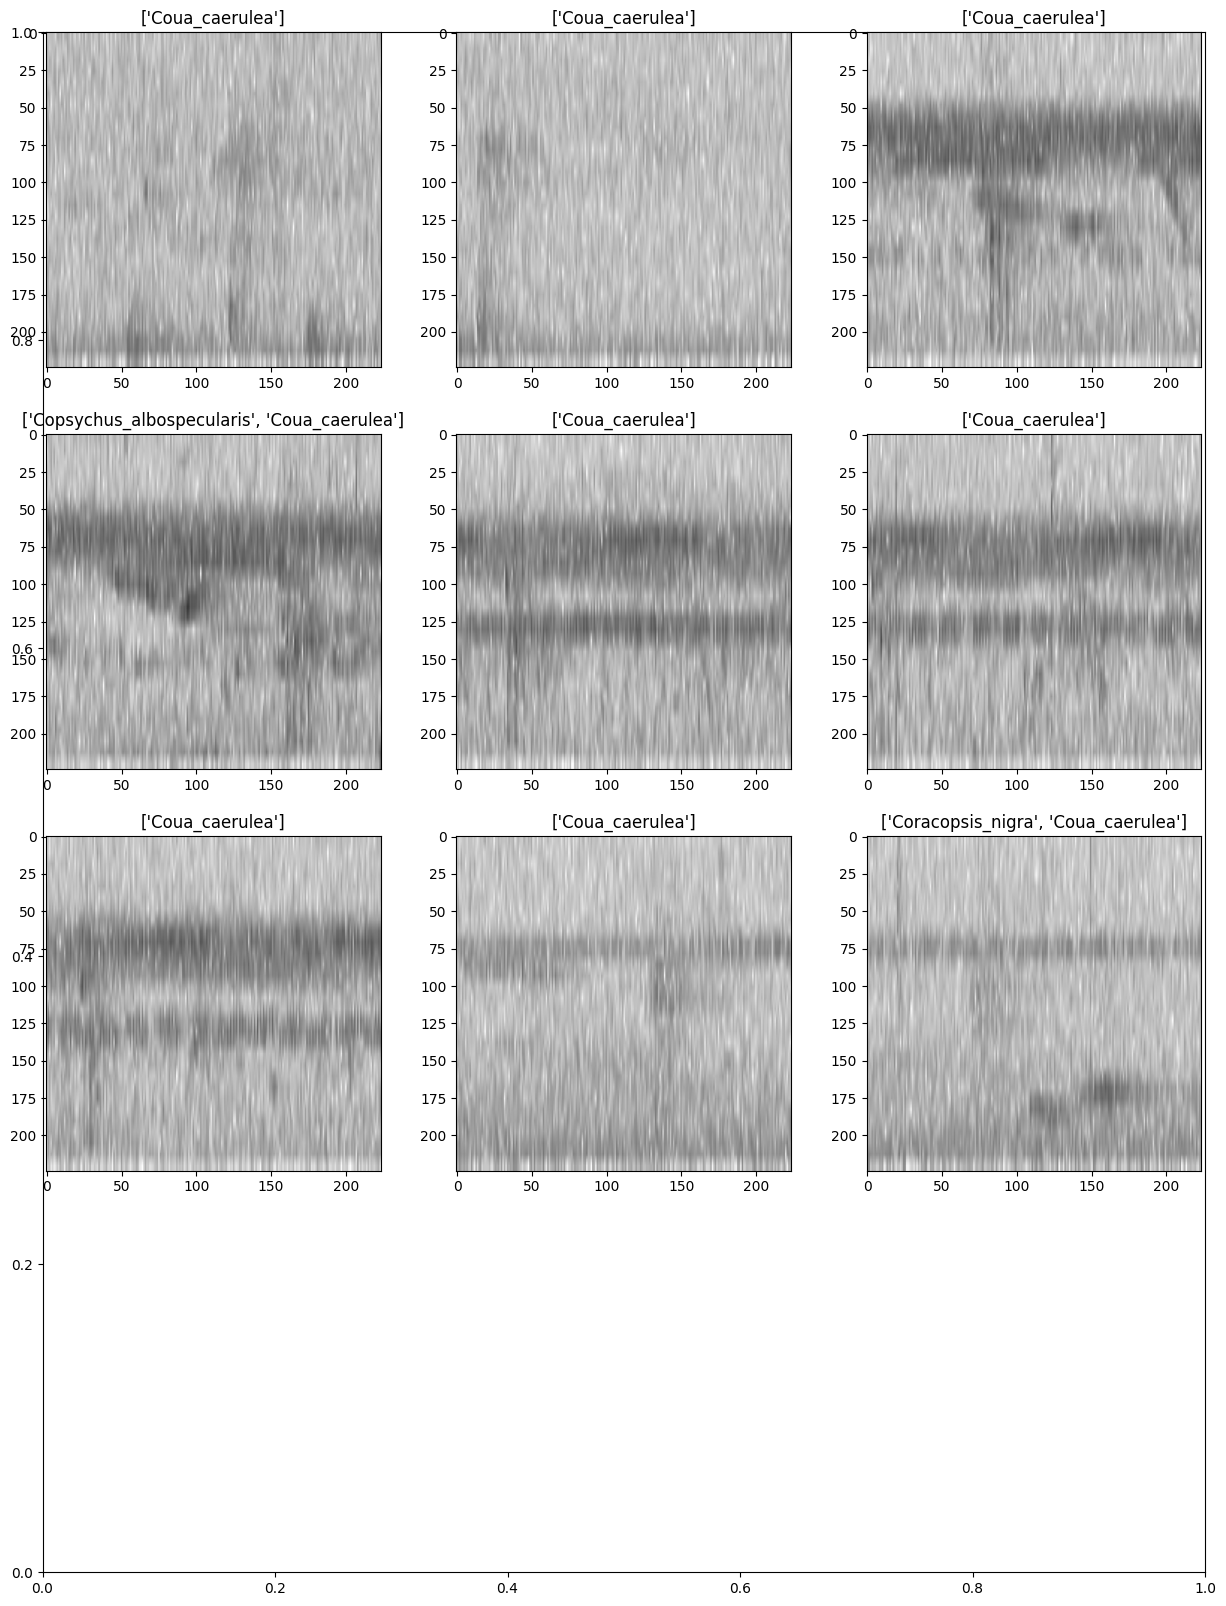

In [58]:
from opensoundscape.preprocess.utils import show_tensor_grid
from opensoundscape import AudioFileDataset
'''pre = SpectrogramPreprocessor(sample_duration=2.0)'''
dataset = AudioFileDataset(samples,model.preprocessor)
dataset.bypass_augmentations = True


tensors = [dataset[i].data for i in range(9)]
sample_labels = [list(dataset[i].labels[dataset[i].labels>0].index) for i in range(9)]

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [62]:
import wandb
try:
    wandb.login()
    wandb_session = wandb.init(
        project='Rewilding_Madagascar',
        name='Train CNN',
    )
except: #if wandb.init fails, don't use wandb logging
    print('failed to create wandb session. wandb session will be None')
    wandb_session = None

wandb: Currently logged in as: sheila-holmes (sheila-holmes-swedish-university-of-agricultural-sciences). Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
